<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [22]:
import pandas as pd
import numpy as np
import random

# Compréhension du problème

Il s'agit d'abord d'un problème d'optimisation du nombre de m2 colisé. 
Comme entré nous avons un tableau regroupant les caractéristique des produit venant de la production

![image](production.png)

In [145]:
entree=pd.read_excel('./imput.xlsx',sheet_name=1,index_col=0)
entree

,LUNGIMI,NR.BUC,MP
12*145,,,
NaN,2400,0,0.0000
NaN,2300,0,0.0000
NaN,2200,6226,1986.0940
NaN,2100,0,0.0000
NaN,2000,0,0.0000
NaN,1900,0,0.0000
NaN,1800,20,5.2200
NaN,1700,0,0.0000
NaN,1600,226,52.4320


In [17]:
entree.loc[entree.LUNGIMI<2200]

,LUNGIMI,NR.BUC,MP
12*145,,,
NaN,2100,0,0.0000
NaN,2000,0,0.0000
NaN,1900,0,0.0000
NaN,1800,20,5.2200
NaN,1700,0,0.0000
NaN,1600,226,52.4320
NaN,1500,0,0.0000
NaN,1400,178,36.1340
NaN,1300,0,0.0000


In [146]:
matrix_input=entree[['LUNGIMI','NR.BUC','MP']]
matrix_input

,LUNGIMI,NR.BUC,MP
12*145,,,
NaN,2400,0,0.0000
NaN,2300,0,0.0000
NaN,2200,6226,1986.0940
NaN,2100,0,0.0000
NaN,2000,0,0.0000
NaN,1900,0,0.0000
NaN,1800,20,5.2200
NaN,1700,0,0.0000
NaN,1600,226,52.4320


Nous allons utiliser un algorithme heuristique pour trouver la meilleur combinaison des différents format.
<br>
Dans un premier temps nous contruirons un algorithme greedy afin de définir une ensemble de solution "basique".
Nous utiliserons ensuitre un algorithme de recuit simulé afin de trouver un optimal
<br> 
Cette procedure va nous demander de réaliser les étapes suivante:
definir une fonction qui va creer un colis(liste de distance) a partir de la matrice des distance disponible
<br> Nous allons réhitérer cette opération jusqu'a ce que cela ne soit plus possible. Soit parce qu'on aura plus de parquet a emballer, soit parce qu'on ne pourra pas créer un couche de 2200 mm.
<br> Afin d'améliorer le résultat nous prendront un certains nombre de lame de la solution que nous reassemblerons suivant le meme processus afin d'augmenter le nombre de colis realiser. 
<br> Cette déconstruction sera de moins en moins profonde en fonction du nombre d'itération dans l'amélioration. 



Nous cherchons l'ensemble des combinaison des distances capable de créer une rangée dans le colis.

In [106]:
import itertools
numbers = entree.loc[entree.LUNGIMI<2200, 'LUNGIMI'].values
result = [seq for i in range(len(numbers), 0, -1) for seq in itertools.combinations(numbers, i) if sum(seq) == 2200]
print (result)

[(1000, 500, 400, 300), (900, 600, 400, 300), (800, 700, 400, 300), (800, 600, 500, 300), (700, 600, 500, 400), (1500, 400, 300), (1400, 500, 300), (1300, 600, 300), (1300, 500, 400), (1200, 700, 300), (1200, 600, 400), (1100, 800, 300), (1100, 700, 400), (1100, 600, 500), (1000, 900, 300), (1000, 800, 400), (1000, 700, 500), (900, 800, 500), (900, 700, 600), (1900, 300), (1800, 400), (1700, 500), (1600, 600), (1500, 700), (1400, 800), (1300, 900), (1200, 1000)]


In [24]:
a=[]
a.append(25)
a

[25]

In [107]:
def update_matrix(matrix, couche):
     for parquet in couche:
                matrix.loc[matrix_apres.LUNGIMI==parquet,'NR.BUC']-=1
    

def create_colis(matrix_input,combinaison,num_iteration=10):
    matrix_apres=matrix_input.copy()
    result=[]
    for iteration in range(num_iteration):
        num_full=random.randint(1,3)
        if matrix_input.loc[matrix_input.LUNGIMI==2200,'NR.BUC'].values<num_full:
            continue
        else:
            for _ in range(num_full):
                result.append([2200])
                update_matrix(matrix_apres,[2200])
            break

    num_variable=6-num_full
    #on suppose ici qu'on ne peut pas avoir deux lames de meme longueur sur une rangée
    #ceci est une assertion tres forte mais pour une demo cela suffira
    for _ in range(num_variable):
        lame_dispo=matrix_apres.loc[matrix_input["NR.BUC"]>0,"LUNGIMI"].values
        
        for _ in range(num_iteration):
            layer_random=combinaison[random.randint(0, len(combinaison)-1)]
            if len([k for k in layer_random if k in lame_dispo])!=len(layer_random):
                pass
            else:
                result.append(list(layer_random))
                update_matrix(matrix_apres,list(layer_random))
                break
    if len(result)==6:           
                
        return [result,matrix_apres]
    else:
        return [False,matrix_apres]

On peut constater les propositions de lignes

On constate que pour des valeurs  importante de num_iteration on arrive presque toujour a avoir un colis.

In [108]:
for _ in range(100):
    print(create_colis(matrix_input,result,num_iteration=100)[0])

[[2200], [2200], [2200], [1600, 600], [1400, 800], [1200, 1000]]
[[2200], [1400, 800], [1400, 800], [1400, 800], [1200, 1000], [1600, 600]]
[[2200], [2200], [1400, 800], [1400, 800], [1400, 800], [1200, 1000]]
[[2200], [2200], [2200], [1600, 600], [1200, 1000], [1200, 1000]]
[[2200], [2200], [2200], [1600, 600], [1600, 600], [1200, 1000]]
[[2200], [2200], [2200], [1600, 600], [1600, 600], [1200, 1000]]
[[2200], [2200], [1600, 600], [1400, 800], [1400, 800], [1600, 600]]
[[2200], [2200], [1400, 800], [1200, 1000], [1600, 600], [1200, 1000]]
[[2200], [1400, 800], [1200, 1000], [1400, 800], [1400, 800], [1600, 600]]
[[2200], [2200], [1200, 1000], [1600, 600], [1400, 800], [1600, 600]]
[[2200], [2200], [2200], [1400, 800], [1600, 600], [1600, 600]]
[[2200], [2200], [1600, 600], [1600, 600], [1600, 600], [1400, 800]]
[[2200], [2200], [1400, 800], [1200, 1000], [1600, 600], [1600, 600]]
[[2200], [1200, 1000], [1400, 800], [1200, 1000], [1400, 800], [1400, 800]]
[[2200], [2200], [2200], [1600

Essayons de construire une solution Globale. 

In [109]:
solution_globale=[]
lame,matrix_apres=create_colis(matrix_input,result,num_iteration=100)
if lame:
    solution_globale.append(lame)
    # Nous supposons ici qu'apres 100 iteration pour construire notre couche on ne peut plus aller au dela
    while lame:
        lame,matrix_apres=create_colis(matrix_apres,result,num_iteration=100)
        if lame:
            solution_globale.append(lame)
            print(lame)


[[2200], [1400, 800], [1200, 1000], [1400, 800], [1200, 1000], [1400, 800]]
[[2200], [2200], [1400, 800], [1200, 1000], [1200, 1000], [1600, 600]]
[[2200], [2200], [2200], [1600, 600], [1400, 800], [1200, 1000]]
[[2200], [1600, 600], [1600, 600], [1400, 800], [1400, 800], [1200, 1000]]
[[2200], [2200], [1400, 800], [1200, 1000], [1200, 1000], [1200, 1000]]
[[2200], [2200], [1400, 800], [1400, 800], [1200, 1000], [1200, 1000]]
[[2200], [1200, 1000], [1400, 800], [1400, 800], [1600, 600], [1400, 800]]
[[2200], [1600, 600], [1200, 1000], [1600, 600], [1600, 600], [1200, 1000]]
[[2200], [1600, 600], [1600, 600], [1200, 1000], [1600, 600], [1400, 800]]
[[2200], [1400, 800], [1200, 1000], [1600, 600], [1600, 600], [1200, 1000]]
[[2200], [2200], [2200], [1600, 600], [1600, 600], [1600, 600]]
[[2200], [2200], [2200], [1200, 1000], [1400, 800], [1600, 600]]
[[2200], [2200], [1600, 600], [1200, 1000], [1600, 600], [1400, 800]]
[[2200], [2200], [2200], [1400, 800], [1200, 1000], [1200, 1000]]
[[2

In [110]:
matrix_apres

,LUNGIMI,NR.BUC,MP
12*145,,,
NaN,2400,0,0.0000
NaN,2300,0,0.0000
NaN,2200,6044,1986.0940
NaN,2100,0,0.0000
NaN,2000,0,0.0000
NaN,1900,0,0.0000
NaN,1800,20,5.2200
NaN,1700,0,0.0000
NaN,1600,79,52.4320


In [147]:
print(f'la solution basique ne contient que {len(solution_globale)}')

la solution basique ne contient que 72


Essayons de prendre en compte plus de combinaison

In [148]:
numbers = entree.loc[entree.LUNGIMI<2200, 'LUNGIMI'].values
result = [seq for i in range(8, 0, -1) for seq in itertools.combinations_with_replacement(numbers, i) if sum(seq) == 2200]
print (result)

[(400, 300, 300, 300, 300, 300, 300), (700, 300, 300, 300, 300, 300), (600, 400, 300, 300, 300, 300), (500, 500, 300, 300, 300, 300), (500, 400, 400, 300, 300, 300), (400, 400, 400, 400, 300, 300), (1000, 300, 300, 300, 300), (900, 400, 300, 300, 300), (800, 500, 300, 300, 300), (800, 400, 400, 300, 300), (700, 600, 300, 300, 300), (700, 500, 400, 300, 300), (700, 400, 400, 400, 300), (600, 600, 400, 300, 300), (600, 500, 500, 300, 300), (600, 500, 400, 400, 300), (600, 400, 400, 400, 400), (500, 500, 500, 400, 300), (500, 500, 400, 400, 400), (1300, 300, 300, 300), (1200, 400, 300, 300), (1100, 500, 300, 300), (1100, 400, 400, 300), (1000, 600, 300, 300), (1000, 500, 400, 300), (1000, 400, 400, 400), (900, 700, 300, 300), (900, 600, 400, 300), (900, 500, 500, 300), (900, 500, 400, 400), (800, 800, 300, 300), (800, 700, 400, 300), (800, 600, 500, 300), (800, 600, 400, 400), (800, 500, 500, 400), (700, 700, 500, 300), (700, 700, 400, 400), (700, 600, 600, 300), (700, 600, 500, 400), (70

On voit clairement que l'ensemble des possibilités pour notre algorithme est encore plus important. 

In [149]:
def update_matrix(matrix, couche):
     for parquet in couche:
                matrix.loc[matrix_apres.LUNGIMI==parquet,'NR.BUC']-=1
    

def create_colis(matrix_input,combinaison,num_iteration=10):
    matrix_apres=matrix_input.copy()
    result=[]
    for iteration in range(num_iteration):
        num_full=random.randint(1,3)
        if matrix_apres.loc[matrix_apres.LUNGIMI==2200,'NR.BUC'].values<num_full:
            continue
        else :
            for _ in range(num_full):
                result.append([2200])
                update_matrix(matrix_apres,[2200])
            break
            
        
    num_variable=6-num_full
    #on suppose ici qu'on ne peut pas avoir deux lames de meme longueur sur une rangée
    #ceci est une assertion tres forte mais pour une demo cela suffira
    for _ in range(num_variable):
        lame_dispo=matrix_apres.loc[matrix_input["NR.BUC"]>0,"LUNGIMI"].values
        
        for _ in range(num_iteration):
            layer_random=combinaison[random.randint(0, len(combinaison)-1)]
            
            if len([k for k in layer_random if matrix_apres.loc[matrix_apres.LUNGIMI==k,"NR.BUC"].values>=layer_random.count([k])])!=len(layer_random):
                pass
            else:
                result.append(list(layer_random))
                update_matrix(matrix_apres,list(layer_random))
                break
    if len(result)==6:           
                
        return [result,matrix_apres]
    else:
        return [False,matrix_apres]

In [150]:
for _ in range(100):
    print(create_colis(matrix_input,result,num_iteration=100)[0])

[[2200], [2200], [800, 800, 600], [800, 800, 600], [1200, 1000], [1000, 600, 600]]
[[2200], [2200], [2200], [1400, 800], [800, 800, 600], [1000, 600, 600]]
[[2200], [2200], [2200], [800, 800, 600], [1400, 800], [1200, 1000]]
[[2200], [1200, 1000], [1200, 1000], [1400, 800], [1000, 600, 600], [1400, 800]]
[[2200], [1200, 1000], [1400, 800], [1100, 1100], [800, 800, 600], [1600, 600]]
[[2200], [2200], [1100, 1100], [1000, 600, 600], [1100, 1100], [1000, 600, 600]]
[[2200], [1600, 600], [800, 800, 600], [1600, 600], [800, 800, 600], [1600, 600]]
[[2200], [2200], [1400, 800], [1000, 600, 600], [1200, 1000], [1000, 600, 600]]
[[2200], [1600, 600], [1200, 1000], [1000, 600, 600], [1400, 800], [800, 800, 600]]
[[2200], [2200], [2200], [1100, 1100], [1600, 600], [800, 800, 600]]
[[2200], [1600, 600], [1000, 600, 600], [1200, 1000], [1400, 800], [800, 800, 600]]
[[2200], [2200], [2200], [1600, 600], [800, 800, 600], [1400, 800]]
[[2200], [2200], [2200], [1400, 800], [1200, 1000], [1000, 600, 60

Essayons maintenant d'avoir une solution globale.

In [151]:
solution_globale=[]
lame,matrix_apres=create_colis(matrix_input,result,num_iteration=100)
if lame:
    solution_globale.append(lame)
    # Nous supposons ici qu'apres 100 iteration pour construire notre couche on ne peut plus aller au dela
    while lame:
        lame,matrix_apres=create_colis(matrix_apres,result,num_iteration=150)
        if lame:
            solution_globale.append(lame)
            print(lame)

[[2200], [2200], [1100, 1100], [800, 800, 600], [800, 800, 600], [1400, 800]]
[[2200], [2200], [800, 800, 600], [1100, 1100], [1600, 600], [1200, 1000]]
[[2200], [2200], [2200], [1400, 800], [1000, 600, 600], [1600, 600]]
[[2200], [2200], [1400, 800], [1000, 600, 600], [1000, 600, 600], [800, 800, 600]]
[[2200], [1200, 1000], [1000, 600, 600], [1600, 600], [1100, 1100], [1600, 600]]
[[2200], [2200], [1600, 600], [800, 800, 600], [1200, 1000], [1400, 800]]
[[2200], [2200], [2200], [1400, 800], [1100, 1100], [1100, 1100]]
[[2200], [2200], [1100, 1100], [1600, 600], [1200, 1000], [1100, 1100]]
[[2200], [2200], [800, 800, 600], [1000, 600, 600], [1200, 1000], [1100, 1100]]
[[2200], [1600, 600], [1000, 600, 600], [1600, 600], [1600, 600], [1400, 800]]
[[2200], [2200], [1100, 1100], [1100, 1100], [800, 800, 600], [1000, 600, 600]]
[[2200], [2200], [2200], [1000, 600, 600], [1400, 800], [800, 800, 600]]
[[2200], [2200], [1000, 600, 600], [1100, 1100], [1000, 600, 600], [1000, 600, 600]]
[[220

In [152]:
matrix_apres

,LUNGIMI,NR.BUC,MP
12*145,,,
NaN,2400,0,0.0000
NaN,2300,0,0.0000
NaN,2200,6035,1986.0940
NaN,2100,0,0.0000
NaN,2000,0,0.0000
NaN,1900,0,0.0000
NaN,1800,20,5.2200
NaN,1700,0,0.0000
NaN,1600,191,52.4320


In [153]:
print(f'la solution basque ne contient que {len(solution_globale)}')

la solution basque ne contient que 93


Le modeles excel que vous nous avez communiquer contient 6226 lame de 2200 pour 1241 colis donc une moyenne de 5.01 ce qui ne respect pas la regle. Cela explique pourquoi notre algorithme greedy est aussi loin du calcul fait sur excel.

In [158]:
def deconstruction(matrix, colis):
    matrix=matrix.copy()
    for couche in colis:
        for parquet in couche:
            matrix.loc[matrix.LUNGIMI==parquet,'NR.BUC']+=1
    return matrix
def step_back(solution_globale,matrix_apres,nombre_de_pas):
    history=[solution_globale]
    for mm in range(45):
        print(f'tentative numero {mm}')
        matrix_reconstruct=matrix_apres.copy()
        for k in range(nombre_de_pas):
            matrix_reconstruct=deconstruction(matrix_reconstruct,solution_globale[-1-k])
        #apres ces iteration on sera revenu dans le temps de nombre_de_pas
        new_solution=solution_globale[:-nombre_de_pas]
        lame,matrix_reconstruct=create_colis(matrix_reconstruct,result,num_iteration=100)
        if lame:
            new_solution.append(lame)
            # Nous supposons ici qu'apres 100 iteration pour construire notre couche on ne peut plus aller au dela
            while lame:
                lame,matrix_reconstruct=create_colis(matrix_reconstruct,result,num_iteration=150)
                if lame:
                    new_solution.append(lame)
        history.append(new_solution)
        if len(new_solution)>len(solution_globale):
            print(f'amelioration de la solution de {len(solution_globale)} a {len(new_solution)}')
            solution_globale=new_solution
            matrix_apres=matrix_reconstruct
            
        else:
            print(f"pas d'amelioration de la solution, la solution trouve est de longueur {len(new_solution)} alors que l'ancienne est de { len( solution_globale)}")
    return [solution_globale,matrix_apres,history]

    
    
    

In [159]:
sol,mat,hist=step_back(solution_globale,matrix_apres,int(2*len(solution_globale)/3))

tentative numero 0
pas d'amelioration de la solution, la solution trouve est de longueur 69 alors que l'ancienne est de 93
tentative numero 1
pas d'amelioration de la solution, la solution trouve est de longueur 56 alors que l'ancienne est de 93
tentative numero 2
pas d'amelioration de la solution, la solution trouve est de longueur 69 alors que l'ancienne est de 93
tentative numero 3
pas d'amelioration de la solution, la solution trouve est de longueur 74 alors que l'ancienne est de 93
tentative numero 4
pas d'amelioration de la solution, la solution trouve est de longueur 56 alors que l'ancienne est de 93
tentative numero 5
amelioration de la solution de 93 a 95
tentative numero 6
pas d'amelioration de la solution, la solution trouve est de longueur 69 alors que l'ancienne est de 95
tentative numero 7
pas d'amelioration de la solution, la solution trouve est de longueur 62 alors que l'ancienne est de 95
tentative numero 8
pas d'amelioration de la solution, la solution trouve est de l

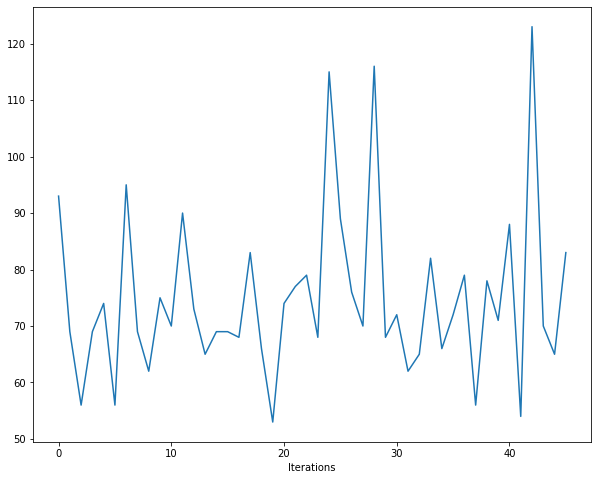

In [164]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.xlabel('Iterations')
plt.plot([len(k) for k in hist])

Il faut s'imaginer que nous parcouront les voisinages de notre solution initiale a la recherche d'optimum. A chaque iteration nous reconstruisons 2/3 des colis. 
<br> La prochaine etape serait d'avoir une fonction de génération de solution initiale qui nous permettrait de parcourir une plus grande zone. 
<br> De plus nous devons reduire à chaque itération la profondeur de la reconstruction afin de figer le travail précédentet d'aller plus en détails. 


# Conclusion

On arrive avec un parametrage basique et quelque itération a améliorer la solution en respectant les contraintes.
<br> Afin d'ameliorer les performances de l'algorithme nous pouvons:
    <li>-utiliser un object numpy comme matrix au lieu d'un dataframe pandas pour acceler le traitement
    <li>-implémenter du paralellisme afin d'aller plus rapidement
    <li>-definir avec vous de meilleur contraintes(plus souple) pour avoir des resultat plus intéressants
    <li>-utiliser la puissance de calcul de serveur distant?
  
De plus Cette algorithme peut s'inscrire dans une application Desktop ou web que vous hebergerez en local sur un hebergeur.
Vous pouvez penser a connecter cette application à votre système d'information afin de prendre en compte des prévisions ou un programme de production. 

